# **Htet Wai Aung**

**The Sparks Foundation: Data Science & Business Analytics Internship**

Task6 : Prediction Using Decision Tree Algorithm

Description : To create the Decision Tree classifier and visualize it graphically. And the purpose is that if any new data is fed into this classifier, it would be able to predict the right class accordingly. 

**Importing Necessary Libraries and Dataset loading**

In [1]:
import sklearn.datasets as datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = datasets.load_iris(as_frame = True)
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris_df.tail(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**Checking Target values and adding them to the dataset**

In [6]:
iris_target = iris.target
iris_target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [7]:
target_zip= dict(zip(set(iris.target), iris.target_names))
iris_df["target"] = iris.target
iris_df["target_names"] = iris_df["target"].map(target_zip)

print(iris_df.shape)
iris_df.head(5)

(150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


**Extracting Features and Labels**

In [8]:
X = iris_df.iloc[:, :4]
y = iris_df.iloc[:, -1]
y.shape

(150,)

**Splitting Training and Testing**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, random_state = 24)

print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)

print("X_test shape: ",X_test.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (120, 4)
y_train shape:  (120,)
X_test shape:  (30, 4)
y_test shape:  (30,)


**Defining Decision Tree Algorithm**

In [10]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)

print('Decision Tree Classifer is Created Successfully!')

Decision Tree Classifer is Created Successfully!


**Visualization the Decision Tree**

In [11]:
# Installing necessary packages

!pip install pydotplus
!apt-get install graphviz -y

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [12]:
# Importing necessary libraries for graph visualization

from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

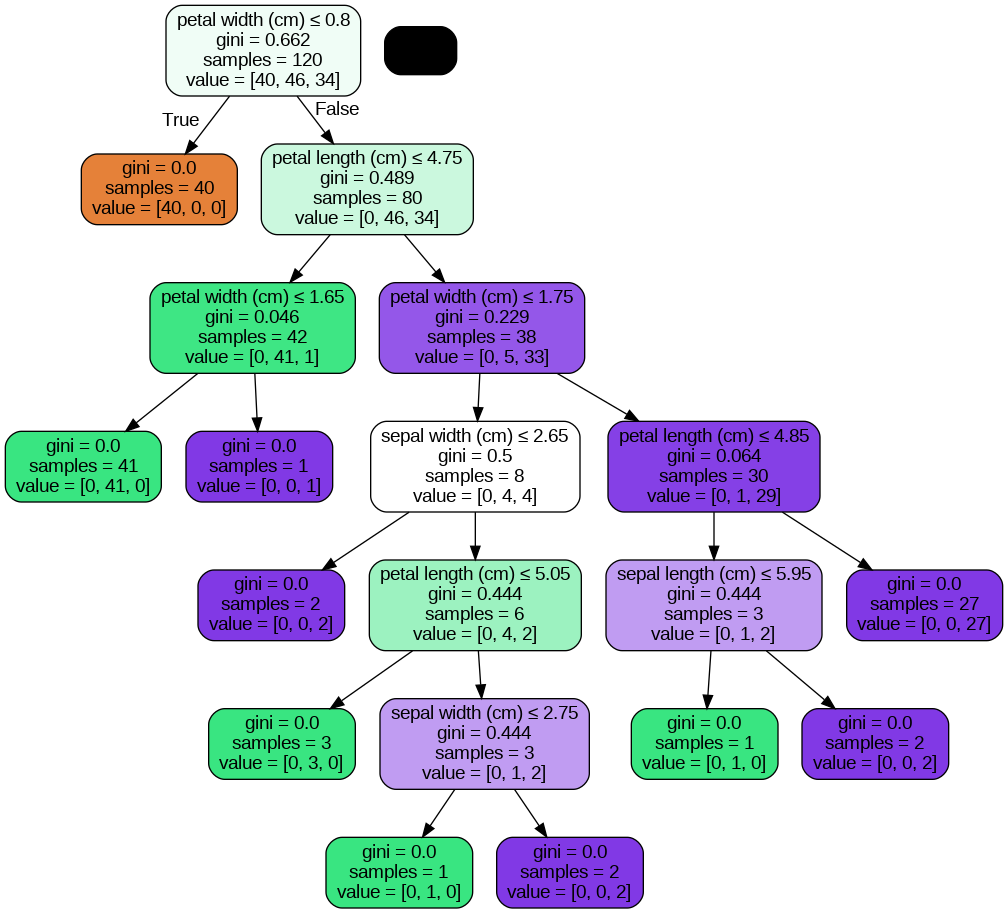

In [13]:
dot_data = StringIO()
export_graphviz(d_tree, out_file = dot_data, feature_names = iris.feature_names,  
                filled = True, rounded = True,
                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Testing with Test Data**

In [14]:
X_test.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
107,7.3,2.9,6.3,1.8
114,5.8,2.8,5.1,2.4
57,4.9,2.4,3.3,1.0
59,5.2,2.7,3.9,1.4
105,7.6,3.0,6.6,2.1


In [15]:
print(y_test.head(10))

107     virginica
114     virginica
57     versicolor
59     versicolor
105     virginica
11         setosa
48         setosa
72     versicolor
29         setosa
148     virginica
Name: target_names, dtype: object


In [16]:
predict_test = d_tree.predict(X_test)
print(predict_test)

['virginica' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'virginica' 'setosa' 'virginica' 'setosa' 'setosa' 'setosa'
 'virginica' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'versicolor' 'virginica'
 'setosa' 'virginica' 'virginica' 'setosa' 'virginica']
